# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [2]:
! git clone https://github.com/DS3001/labs

Cloning into 'labs'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 80 (delta 28), reused 29 (delta 17), pack-reused 31 (from 1)
Receiving objects: 100% (80/80), 20.54 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Pt 1

In [4]:
df = pd.read_csv('/content/labs/04_hedonic_pricing/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [5]:
df['No_of_Owners'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

For cleaning, No_of_Owners, I'm going to change it to "1", "2", and "3" for better interpretation of the varianble.

In [6]:
df['No_of_Owners'] = df['No_of_Owners'].replace('1st', '1')
df['No_of_Owners'] = df['No_of_Owners'].replace('2nd', '2')
df['No_of_Owners'] = df['No_of_Owners'].replace('3rd', '3')

In [7]:
df['Seating_Capacity'].dtype

dtype('int64')

<Axes: >

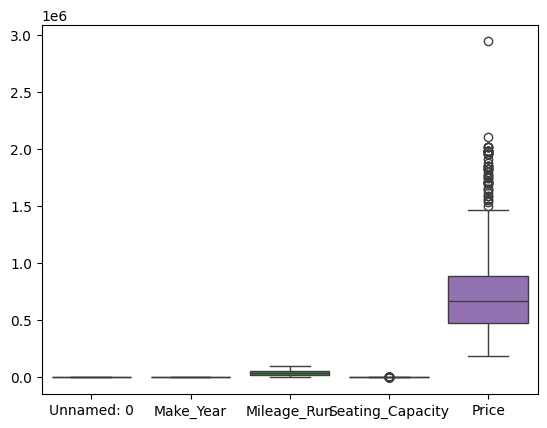

In [8]:
sns.boxplot(data=df)

In [9]:
df = df.drop('Unnamed: 0',axis=1)

In [10]:
df['price_arcsin'] = np.arcsinh(df['Price'])
df['mileage_arcsin'] = np.arcsinh(df['Mileage_Run'])

<Axes: >

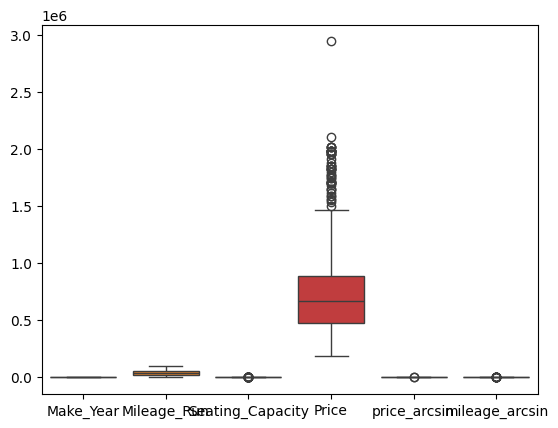

In [11]:
sns.boxplot(data=df)

<Axes: >

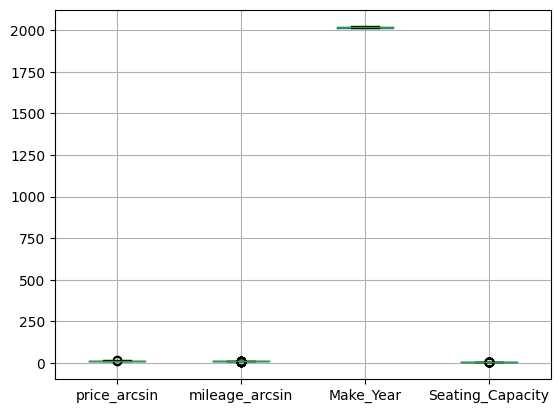

In [12]:
df[['price_arcsin', 'mileage_arcsin', 'Make_Year',  'Seating_Capacity']].boxplot()

Make year is  more categorical as is. Adding age column

In [13]:
df['age'] = max(df['Make_Year'])-df['Make_Year']

<Axes: >

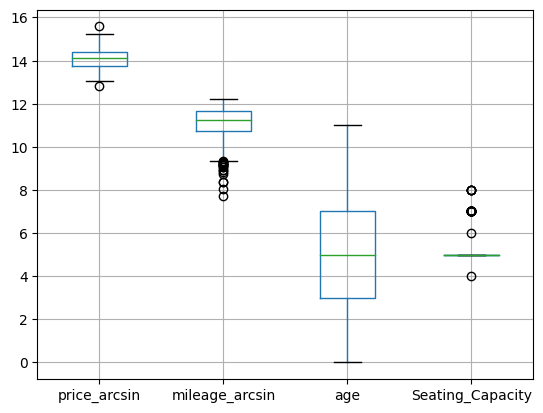

In [14]:
df[['price_arcsin', 'mileage_arcsin', 'age',  'Seating_Capacity']].boxplot()

In [15]:
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,price_arcsin,mileage_arcsin,age
0,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000,14.088586,11.398883,5
1,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000,14.125932,10.611770,6
2,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000,14.276726,10.986648,3
3,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000,13.626768,11.175493,5
4,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000,13.845069,10.824806,5


Pt2

In [19]:
make = pd.get_dummies(df['Make'],dtype=float)
colors = pd.get_dummies(df['Color'],dtype=float)
fuel_type = pd.get_dummies(df['Fuel_Type'],dtype=float)
transmission = pd.get_dummies(df['Transmission'],dtype=float)
transmission_type = pd.get_dummies(df['Transmission_Type'],dtype=float)

In [20]:
df2 = pd.concat([df, make, colors, fuel_type, transmission, transmission_type], axis=1)
df2.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,...,diesel,petrol,petrol+cng,4-Speed,5-Speed,6-Speed,7-Speed,CVT,Automatic,Manual
0,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Pt 3

In [23]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df2['Price']
X = df2.loc[:,['Mileage_Run','No_of_Owners','Seating_Capacity','price_arcsin','mileage_arcsin', 'age','7-Speed','5-Speed','diesel','petrol','Automatic','Manual','red', 'white', 'silver', 'bronze'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes


Pt 4

In [33]:
Z_train = pd.concat([X_train['Automatic'],X_train['Manual']],axis=1)
Z_test = pd.concat([X_test['Automatic'],X_test['Manual']], axis=1)

In [31]:

def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})


In [34]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.03223973914247846
RMSE:  364530.37788369705


,variable,coefficient
0,Automatic,841542.452830
1,Manual,700704.225352


In [35]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_test,y_test) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.033348948509945076
RMSE:  364321.4126820142


,variable,coefficient
0,Automatic,861730.769231
1,Manual,708458.333333


In [40]:
Z_train = X_train
Z_test = X_test

In [41]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.9169662860110122
RMSE:  106776.84032292991


,variable,coefficient
0,Mileage_Run,-1.578721e+00
1,No_of_Owners,-3.988731e+03
2,Seating_Capacity,-1.405973e+04
3,price_arcsin,7.779590e+05
4,mileage_arcsin,2.373630e+04
5,age,1.121593e+04
6,7-Speed,1.243349e+05
7,5-Speed,-4.602775e+04
8,diesel,5.820015e+04
9,petrol,3.543697e+04


In [42]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_test,y_test) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.9252473236110147
RMSE:  101312.54069800595


,variable,coefficient
0,Mileage_Run,-6.861150e-01
1,No_of_Owners,-1.208368e+04
2,Seating_Capacity,-3.283150e+04
3,price_arcsin,7.976128e+05
4,mileage_arcsin,5.171487e+03
5,age,1.202565e+04
6,7-Speed,-7.971820e+04
7,5-Speed,-4.481841e+04
8,diesel,-5.170886e+06
9,petrol,-5.214692e+06


THe model built on the test data works better

Q5

In [36]:
Z_train = X_train
Z_test = X_test

make = pd.get_dummies(df['C'],dtype=float)
colors = pd.get_dummies(df['Color'],dtype=float)
fuel_type = pd.get_dummies(df['Fuel_Type'],dtype=float)
transmission = pd.get_dummies(df['Transmission'],dtype=float)
transmission_type = pd.get_dummies(df['Transmission_Type'],dtype=float)

In [50]:
A= Z_test
#A=A.drop(['Make','Body_Type', 'Color', 'Fuel_Type', 'No_of_Owners', 'Transmission', 'Transmission_Type'], axis=1)

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(A) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,Mileage_Run,No_of_Owners,Seating_Capacity,price_arcsin,mileage_arcsin,age,7-Speed,5-Speed,diesel,petrol,...,red^2,red white,red silver,red bronze,white^2,white silver,white bronze,silver^2,silver bronze,bronze^2
0,23227.0,1.0,5.0,13.500800,10.746218,10.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7981.0,1.0,5.0,14.334304,9.677966,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,60209.0,1.0,5.0,14.401073,11.698724,4.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49335.0,2.0,5.0,14.027391,11.499536,5.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,64313.0,1.0,5.0,13.916260,11.764664,6.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
B= Z_train
#B=B.drop(['Make','Body_Type', 'Color', 'Fuel_Type', 'No_of_Owners', 'Transmission', 'Transmission_Type'], axis=1)

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z2 = expander.fit_transform(B) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf2 = pd.DataFrame(data=Z2, columns = names) # Create a new, expanded dataframe
zdf2.head()

,Mileage_Run,No_of_Owners,Seating_Capacity,price_arcsin,mileage_arcsin,age,7-Speed,5-Speed,diesel,petrol,...,red^2,red white,red silver,red bronze,white^2,white silver,white bronze,silver^2,silver bronze,bronze^2
0,72356.0,1.0,5.0,13.492547,11.882501,9.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,28831.0,1.0,5.0,14.274200,10.962354,5.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,56762.0,1.0,5.0,13.960476,11.639770,6.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30234.0,1.0,5.0,15.211260,11.009870,2.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36822.0,1.0,5.0,13.965653,11.206998,6.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
Z_train = zdf2
Z_test = zdf

In [55]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.9977318850438707
RMSE:  17647.46643777164


,variable,coefficient
0,Mileage_Run,-9.048641e+02
1,No_of_Owners,4.240093e+04
2,Seating_Capacity,3.833904e+05
3,price_arcsin,-5.268878e+06
4,mileage_arcsin,2.993242e+05
...,...,...
147,white silver,0.000000e+00
148,white bronze,0.000000e+00
149,silver^2,-2.777602e+04
150,silver bronze,0.000000e+00


In [56]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_test,y_test) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.9989679515596849
RMSE:  11904.19066973027


,variable,coefficient
0,Mileage_Run,-5.883625e+04
1,No_of_Owners,-1.227717e+08
2,Seating_Capacity,-2.159518e+07
3,price_arcsin,6.481378e+06
4,mileage_arcsin,1.270043e+07
...,...,...
147,white silver,0.000000e+00
148,white bronze,0.000000e+00
149,silver^2,1.757339e+07
150,silver bronze,0.000000e+00


The R^2 and RMSE values are much nicer on the interaction terms. We can see the the R^2 val is closer to 1 and the RMSE val is smaller

Part 6

The model improved significantly after adding in interaction terms. However, due to all the different dummy variables for each categorical variable, and then the interaction terms on top oof that, it would be difficult to interpret and compare all results. THere were 151 coefficients in the interactions model.


However, The models from the earlier question were a bit simple and there wasn't really anyway to figure out how variables were impacting each other.

I think this really displays the importance of overfitting v underfitting. It's important to find a balance in how many variables you choose. If I were to do another model, I would choose only a few of the original categorical variables to look at in relation to rest of the data in the model in order to reduce quantity of the interaction terms